# **Time Series Gold Forcasting (1968-2025)**

## **Data Understanding**

### Basic Information

* Total rows: `14,496`
* Columns: 2

  1. `Date` → datetime (`1968-03-22` to `2025`)
  2. `gold_price_usd` → float (gold price in USD)

---

### Date Column

* Type: `datetime64[ns]`
* No missing values
* Represents daily gold price records from 1968 onward.

---

### Gold Price Column (`gold_price_usd`)

* Type: `float64`
* No missing values
* Min: 34.95 USD
* Max: 3,983.40 USD
* Mean: 711.86 USD
* Median: 394.58 USD
* 25% Quantile: 299.60 USD
* 75% Quantile: 1,202.31 USD

---

### Insights

* Data is complete (no nulls).
* Price range shows a large increase over time.
* Distribution is likely right-skewed (mean > median), indicating more recent higher prices.
* This dataset is suitable for time series analysis (trend, forecasting, volatility, etc.).

### Download Data from Yahoo Finance (2000 - 2025)

In [1]:
# import os
# import yfinance as yf

# # Define the ticker symbol
# ticker_symbol = "GC=F"

# # Create a Ticker object
# ticker = yf.Ticker(ticker_symbol)

# # Fetch historical market data
# historical_data = ticker.history(period="max")
# print("Historical Data:")
# print(historical_data)

# # Fetch basic financials
# financials = ticker.financials
# print("\nFinancials:")
# print(financials)

# # Fetch stock actions like dividends and splits
# actions = ticker.actions
# print("\nStock Actions:")
# print(actions)

# # Save historical data to a CSV file
# os.makedirs("data", exist_ok=True)
# historical_data.to_excel("data/gold_2000-2025.xlsx")

### Data Merging

In [2]:
# import pandas as pd
# df_gold_1968_2024 = pd.read_excel('data/Nilai Emas dalam USD.xlsx', parse_dates=['Date'])
# df_gold_2000_2025 = pd.read_excel('data/gold_2000-2025.xlsx', parse_dates=['Date'])

In [3]:
# # Step 1: Normalize the Date columns (remove timezone info and ensure consistent format)
# import pandas as pd

# # Create copies of the datasets to avoid modifying originals
# df1 = df_gold_1968_2024.copy()
# df2 = df_gold_2000_2025.copy()

# # Normalize dates (remove timezone information)
# df1['Date'] = pd.to_datetime(df1['Date']).dt.date
# # For df2, first convert to UTC then to date to handle timezone
# df2['Date'] = pd.to_datetime(df2['Date'], utc=True).dt.date

# # Rename columns to English standard names
# df1_normalized = df1.rename(columns={'Price_USD_Gold': 'gold_price_usd'})
# df2_normalized = df2[['Date', 'Close']].rename(columns={'Close': 'gold_price_usd'})

# # Step 2: Merge datasets with priority to df_gold_1968_2024
# # First, find overlapping dates
# df1_dates = set(df1_normalized['Date'])
# df2_dates = set(df2_normalized['Date'])
# overlapping_dates = df1_dates.intersection(df2_dates)

# # Remove overlapping dates from df2 (since df1 takes priority)
# df2_filtered = df2_normalized[~df2_normalized['Date'].isin(overlapping_dates)]

# # Combine the datasets
# merged_gold_data = pd.concat([df1_normalized, df2_filtered], ignore_index=True)

# # Sort by date
# merged_gold_data = merged_gold_data.sort_values('Date').reset_index(drop=True)

# # Convert Date back to datetime for easier manipulation
# merged_gold_data['Date'] = pd.to_datetime(merged_gold_data['Date'])

# # Save the merged dataset
# merged_gold_data.to_excel('data/gold_1968-2025.xlsx', index=False)

## **Exploratory Data Analysis (EDA)**

### Import Libraries & Load Data

In [ ]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display settings
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [5]:
# Load dataset
file_path = 'data/gold_1968-2025.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [6]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14496 entries, 0 to 14495
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            14496 non-null  datetime64[ns]
 1   gold_price_usd  14496 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 226.6 KB


### Basic Descriptive Statistics

In [7]:
# Descriptive stats
print("\nDescriptive Statistics:")
print(df.describe())

# Date range
print(f"\nDate range: {df['Date'].min().date()} to {df['Date'].max().date()}")


Descriptive Statistics:
                                Date  gold_price_usd
count                          14496       14,496.00
mean   1997-09-25 11:53:38.543046400          711.86
min              1968-03-22 00:00:00           34.95
25%              1983-11-01 18:00:00          299.60
50%              1997-11-17 12:00:00          394.58
75%              2011-10-19 06:00:00        1,202.31
max              2025-10-07 00:00:00        3,983.40
std                              NaN          652.84

Date range: 1968-03-22 to 2025-10-07


### Gold Price Trend Over Time

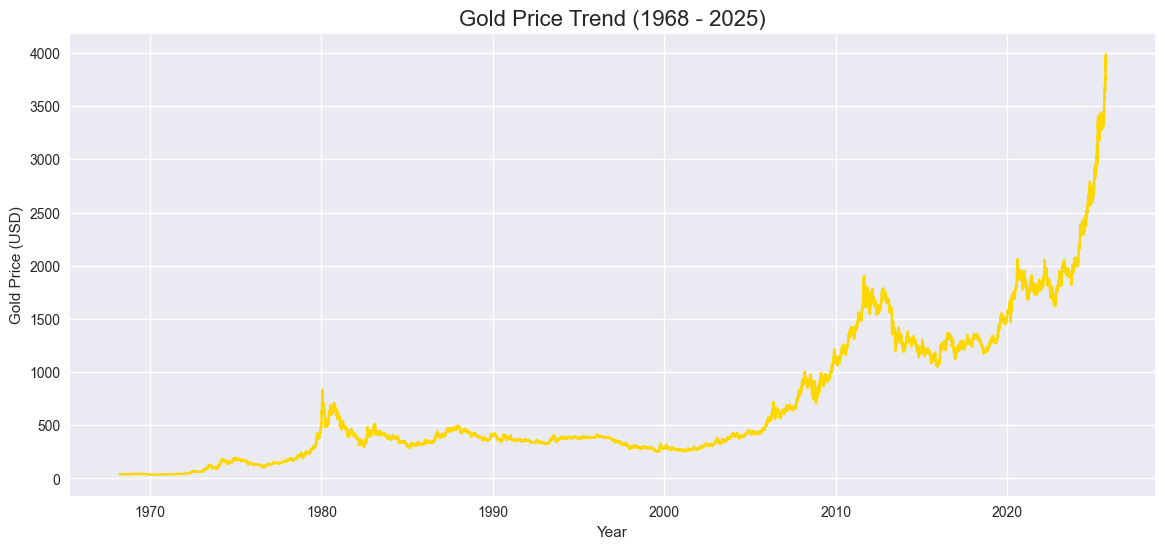

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['gold_price_usd'], color='gold')
plt.title('Gold Price Trend (1968 - 2025)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Gold Price (USD)')
plt.grid(True)
plt.show()

### Monthly Price

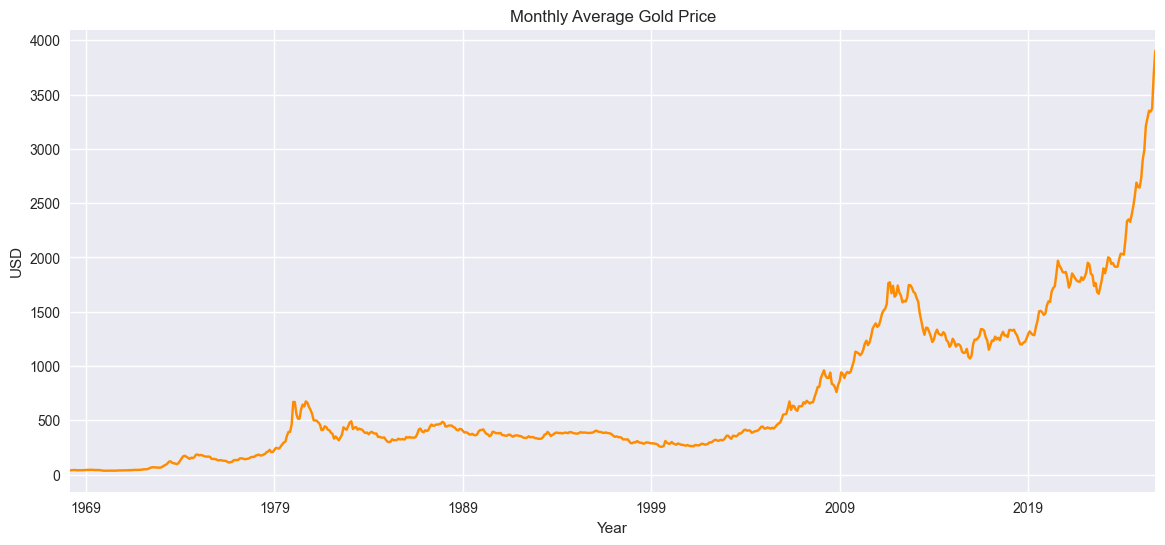

In [9]:
# Convert Date to index for resampling
df = df.set_index('Date')

# Monthly average
monthly = df['gold_price_usd'].resample('M').mean()

plt.figure(figsize=(14,6))
monthly.plot(color='darkorange')
plt.title('Monthly Average Gold Price')
plt.xlabel('Year')
plt.ylabel('USD')
plt.grid(True)
plt.show()

### Yearly Gold Price

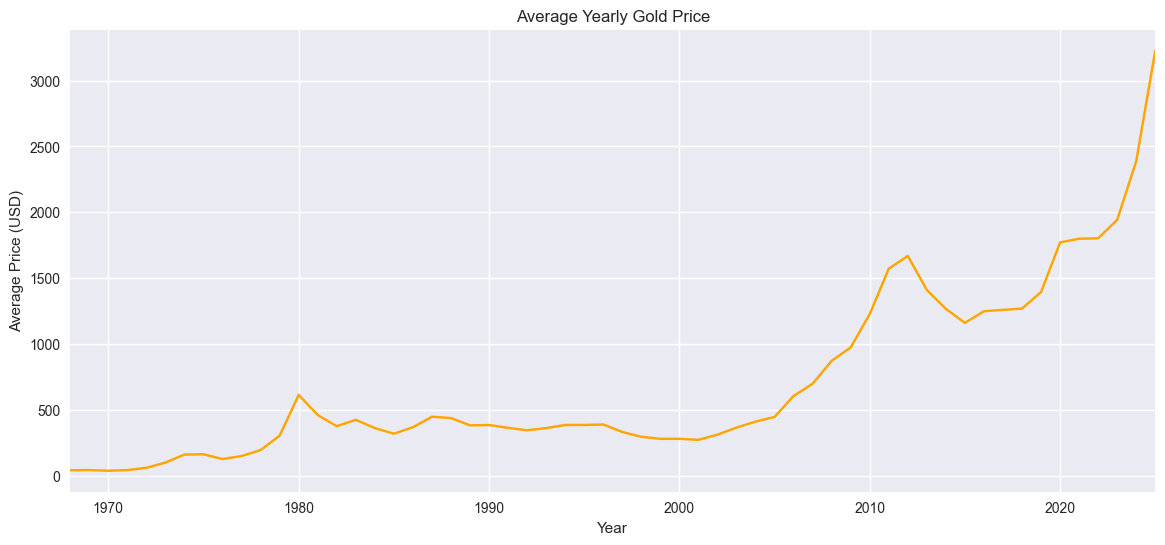

In [10]:
# Monthly average
yearly_avg = df['gold_price_usd'].resample('Y').mean()

plt.figure(figsize=(14,6))
yearly_avg.plot(kind='line', color='orange')
plt.title('Average Yearly Gold Price')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()

### Daily Change

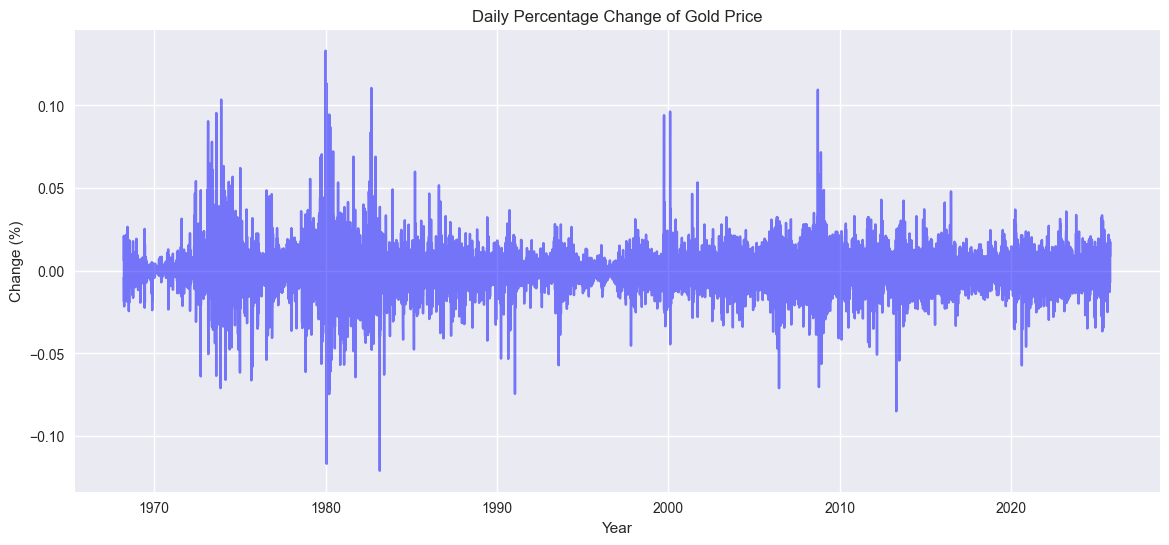

count   14,495.00
mean         0.00
std          0.01
min         -0.12
25%         -0.00
50%          0.00
75%          0.01
max          0.13
Name: Daily_Change, dtype: float64


In [11]:
# Calculate daily return
df['Daily_Change'] = df['gold_price_usd'].pct_change()

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Daily_Change'], color='blue', alpha=0.5)
plt.title('Daily Percentage Change of Gold Price')
plt.xlabel('Year')
plt.ylabel('Change (%)')
plt.grid(True)
plt.show()

# Summary of daily change
print(df['Daily_Change'].describe())

## **Data Preprocessing**

### Data Preparation for Time Series Modeling

In [13]:
# Reset index and prepare data for time series modeling
df_reset = df.reset_index()
print(f"Dataset shape: {df_reset.shape}")
print(f"Date range: {df_reset['Date'].min()} to {df_reset['Date'].max()}")

# Handle missing values in Daily_Change (first row will be NaN due to pct_change)
df_clean = df_reset.dropna().copy()
print(f"After removing NaN: {df_clean.shape}")

# Features for modeling
gold_prices = df_clean['gold_price_usd'].values.reshape(-1, 1)
daily_changes = df_clean['Daily_Change'].values.reshape(-1, 1)

print(f"Gold prices shape: {gold_prices.shape}")
print(f"Daily changes shape: {daily_changes.shape}")

Dataset shape: (14496, 3)
Date range: 1968-03-22 00:00:00 to 2025-10-07 00:00:00
After removing NaN: (14495, 3)
Gold prices shape: (14495, 1)
Daily changes shape: (14495, 1)


### Create Sequences for LSTM/GRU

In [14]:
def create_sequences(data, sequence_length):
    """
    Create sequences for LSTM/GRU training
    
    Parameters:
    - data: scaled time series data
    - sequence_length: number of time steps to look back
    
    Returns:
    - X: features (sequences)
    - y: targets (next values)
    """
    X, y = [], []
    
    for i in range(sequence_length, len(data)):
        # Use past 'sequence_length' values as features
        X.append(data[i-sequence_length:i, 0])
        # Predict next value
        y.append(data[i, 0])
    
    return np.array(X), np.array(y)

# Define sequence length (lookback period)
SEQUENCE_LENGTH = 30  # Use 30 days of historical data to predict next day

# Create sequences for gold prices
X_price, y_price = create_sequences(gold_prices, SEQUENCE_LENGTH)
X_change, y_change = create_sequences(daily_changes, SEQUENCE_LENGTH)

print(f"✅ Sequences created successfully!")
print(f"Input sequences shape (X_price): {X_price.shape}")
print(f"Target values shape (y_price): {y_price.shape}")
print(f"Input sequences shape (X_change): {X_change.shape}")
print(f"Target values shape (y_change): {y_change.shape}")

✅ Sequences created successfully!
Input sequences shape (X_price): (14465, 30)
Target values shape (y_price): (14465,)
Input sequences shape (X_change): (14465, 30)
Target values shape (y_change): (14465,)


### Stratified Random Split

In [19]:
# Optimized Stratified random split by time periods
# This ensures we have sequences from different time periods in both sets

def fast_stratified_time_split(X, y, test_size=0.2, n_chunks=10, random_state=42):
    """
    Fast stratified split using vectorized operations
    
    Parameters:
    - X, y: input sequences and targets
    - test_size: proportion for validation
    - n_chunks: number of time chunks to create
    - random_state: for reproducibility
    
    Returns:
    - X_train, X_val, y_train, y_val, train_indices, val_indices
    """
    np.random.seed(random_state)
    
    total_samples = len(X)
    chunk_size = total_samples // n_chunks
    
    # Create chunk assignments for all samples
    chunk_ids = np.repeat(np.arange(n_chunks), chunk_size)
    
    # Handle remaining samples (assign to last chunk)
    remaining = total_samples - len(chunk_ids)
    if remaining > 0:
        chunk_ids = np.concatenate([chunk_ids, np.full(remaining, n_chunks-1)])
    
    # For each chunk, randomly assign samples to train/val
    train_mask = np.zeros(total_samples, dtype=bool)
    
    for chunk_id in range(n_chunks):
        chunk_mask = (chunk_ids == chunk_id)
        chunk_indices = np.where(chunk_mask)[0]
        
        # Randomly shuffle and split this chunk
        np.random.shuffle(chunk_indices)
        val_size = int(len(chunk_indices) * test_size)
        
        # Mark training samples (everything except first val_size samples)
        train_mask[chunk_indices[val_size:]] = True
    
    # Get indices
    train_indices = np.where(train_mask)[0]
    val_indices = np.where(~train_mask)[0]
    
    return X[train_indices], X[val_indices], y[train_indices], y[val_indices], train_indices, val_indices

# Use the optimized stratified time split
print("🎯 Using Fast Stratified Time Split by Periods")
print("📊 Optimized version for better performance")
print()

# Execute the fast stratified split
X1_train, X1_val, y1_train, y1_val, train1_idx, val1_idx = fast_stratified_time_split(
    X_price, y_price, test_size=0.2, n_chunks=10, random_state=42
)

X2_train, X2_val, y2_train, y2_val, train2_idx, val2_idx = fast_stratified_time_split(
    X_change, y_change, test_size=0.2, n_chunks=10, random_state=42
)

print("🔄 Fast Stratified Time Split Summary:")
print("="*60)
print(f"Total samples: {len(X_price):,}")
print(f"Training samples: {len(X1_train):,} ({len(X1_train)/len(X_price)*100:.1f}%)")
print(f"Validation samples: {len(X1_val):,} ({len(X1_val)/len(X_price)*100:.1f}%)")
print("="*60)
print(f"Training features shape: {X1_train.shape}")
print(f"Training targets shape: {y1_train.shape}")
print(f"Validation features shape: {X1_val.shape}")
print(f"Validation targets shape: {y1_val.shape}")
print("="*60)
print("✅ Fast stratified time split completed!")
print("⚡ Optimized for performance with vectorized operations")
print("🎲 Each time chunk contributes both training and validation samples")
print("📈 Better temporal distribution for robust model training")

🎯 Using Fast Stratified Time Split by Periods
📊 Optimized version for better performance

🔄 Fast Stratified Time Split Summary:
Total samples: 14,465
Training samples: 11,574 (80.0%)
Validation samples: 2,891 (20.0%)
Training features shape: (11574, 30)
Training targets shape: (11574,)
Validation features shape: (2891, 30)
Validation targets shape: (2891,)
✅ Fast stratified time split completed!
⚡ Optimized for performance with vectorized operations
🎲 Each time chunk contributes both training and validation samples
📈 Better temporal distribution for robust model training


In [26]:
X1_train

array([[  40.25      ,   41.1       ,   40.35      , ...,   40.45      ,
          40.55      ,   40.45      ],
       [  41.1       ,   40.35      ,   39.6       , ...,   40.55      ,
          40.45      ,   40.75      ],
       [  40.35      ,   39.6       ,   39.45      , ...,   40.45      ,
          40.75      ,   41.3       ],
       ...,
       [3343.39990234, 3336.89990234, 3374.39990234, ..., 3820.89990234,
        3840.80004883, 3867.5       ],
       [3374.39990234, 3373.80004883, 3388.60009766, ..., 3867.5       ,
        3839.69995117, 3880.80004883],
       [3373.80004883, 3388.60009766, 3404.60009766, ..., 3839.69995117,
        3880.80004883, 3948.5       ]])

### Visualization of Split Distribution

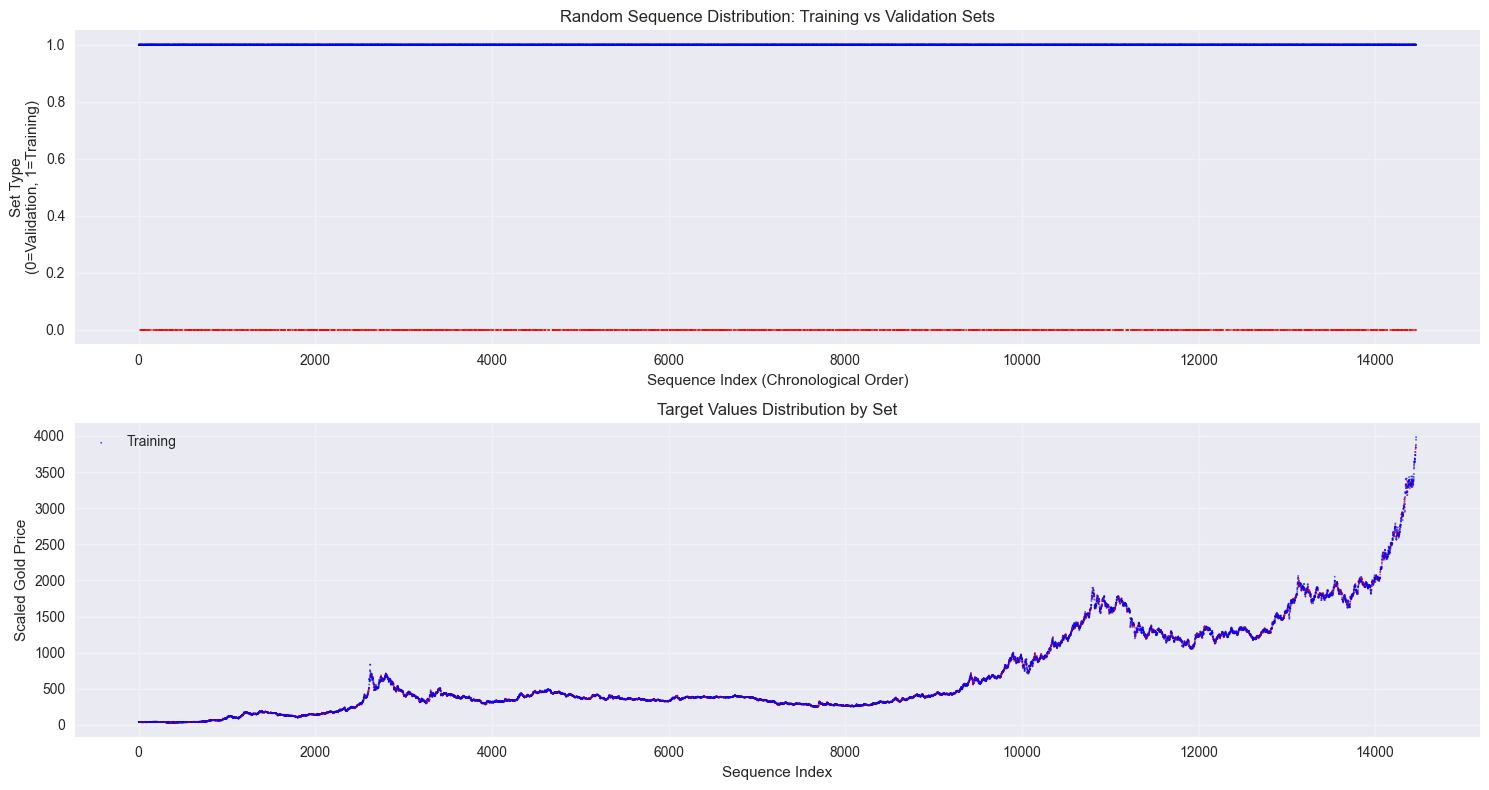

🔍 Randomness Analysis:
Training indices range: 0 to 14464
Validation indices range: 15 to 14462
Training indices std deviation: 4175.90
Validation indices std deviation: 4174.82
✅ Higher std deviation indicates more randomness in selection!


In [ ]:
# Visualize the distribution of training and validation sequences over time
plt.figure(figsize=(15, 8))

# Create a binary array showing train(1) vs val(0) for each sequence
split_distribution = np.zeros(len(X_price))
split_distribution[train1_idx] = 1

# Plot the distribution
plt.subplot(2, 1, 1)
plt.scatter(range(len(split_distribution)), split_distribution, 
           c=['red' if x == 0 else 'blue' for x in split_distribution], 
           alpha=0.6, s=1)
plt.title('Random Sequence Distribution: Training vs Validation Sets')
plt.ylabel('Set Type\n(0=Validation, 1=Training)')
plt.xlabel('Sequence Index (Chronological Order)')
plt.grid(True, alpha=0.3)

# Show target value distribution
plt.subplot(2, 1, 2)
plt.scatter(range(len(y_price)), y_price, 
           c=['red' if i in val1_idx else 'blue' for i in range(len(y_price))], 
           alpha=0.6, s=1)
plt.title('Target Values Distribution by Set')
plt.ylabel('Gold Price')
plt.xlabel('Sequence Index')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics about the randomness
print("🔍 Randomness Analysis:")
print("="*50)
print(f"Training indices range: {train1_idx.min()} to {train1_idx.max()}")
print(f"Validation indices range: {val1_idx.min()} to {val1_idx.max()}")
print(f"Training indices std deviation: {train1_idx.std():.2f}")
print(f"Validation indices std deviation: {val1_idx.std():.2f}")
print("="*50)
print("✅ Higher std deviation indicates more randomness in selection!")

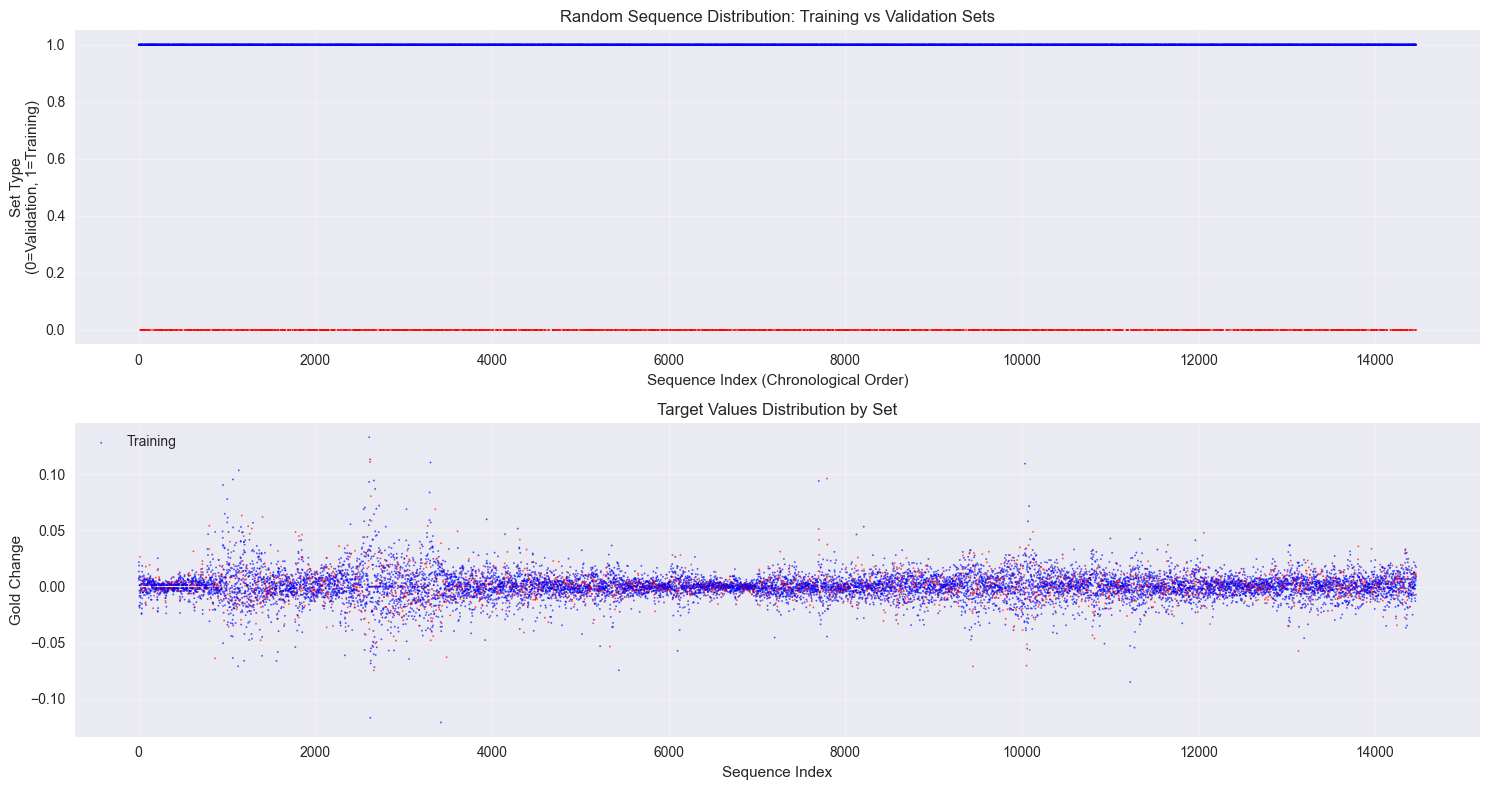

🔍 Randomness Analysis:
Training indices range: 0 to 14464
Validation indices range: 15 to 14462
Training indices std deviation: 4175.90
Validation indices std deviation: 4174.82
✅ Higher std deviation indicates more randomness in selection!


In [21]:
# Visualize the distribution of training and validation sequences over time
plt.figure(figsize=(15, 8))

# Create a binary array showing train(1) vs val(0) for each sequence
split_distribution = np.zeros(len(X_change))
split_distribution[train2_idx] = 1

# Plot the distribution
plt.subplot(2, 1, 1)
plt.scatter(range(len(split_distribution)), split_distribution, 
           c=['red' if x == 0 else 'blue' for x in split_distribution], 
           alpha=0.6, s=1)
plt.title('Random Sequence Distribution: Training vs Validation Sets')
plt.ylabel('Set Type\n(0=Validation, 1=Training)')
plt.xlabel('Sequence Index (Chronological Order)')
plt.grid(True, alpha=0.3)

# Show target value distribution
plt.subplot(2, 1, 2)
plt.scatter(range(len(y_change)), y_change, 
           c=['red' if i in val2_idx else 'blue' for i in range(len(y_change))], 
           alpha=0.6, s=1)
plt.title('Target Values Distribution by Set')
plt.ylabel('Gold Change')
plt.xlabel('Sequence Index')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics about the randomness
print("🔍 Randomness Analysis:")
print("="*50)
print(f"Training indices range: {train2_idx.min()} to {train2_idx.max()}")
print(f"Validation indices range: {val2_idx.min()} to {val2_idx.max()}")
print(f"Training indices std deviation: {train2_idx.std():.2f}")
print(f"Validation indices std deviation: {val2_idx.std():.2f}")
print("="*50)
print("✅ Higher std deviation indicates more randomness in selection!")

### Reshape Data for LSTM/GRU Input

In [22]:
# Reshape data for LSTM/GRU input format: (samples, time steps, features)
# Current shape: (samples, time steps) -> Target shape: (samples, time steps, 1)

X1_train_reshaped = X1_train.reshape((X1_train.shape[0], X1_train.shape[1], 1))
X1_val_reshaped = X1_val.reshape((X1_val.shape[0], X1_val.shape[1], 1))

X2_train_reshaped = X2_train.reshape((X2_train.shape[0], X2_train.shape[1], 1))
X2_val_reshaped = X2_val.reshape((X2_val.shape[0], X2_val.shape[1], 1))

print("🔄 Data Reshaping Complete:")
print("="*40)
print(f"Original X_train shape: {X1_train.shape}")
print(f"Reshaped X_train shape: {X1_train_reshaped.shape}")
print(f"Original X_val shape: {X1_val.shape}")
print(f"Reshaped X_val shape: {X1_val_reshaped.shape}")
print("="*40)
print("✅ Data is ready for LSTM and GRU models!")
print(f"📈 Input format: (samples={X1_train_reshaped.shape[0]}, time_steps={X1_train_reshaped.shape[1]}, features={X1_train_reshaped.shape[2]})")
print("🎲 Random sequence distribution ensures better generalization!")

🔄 Data Reshaping Complete:
Original X_train shape: (11574, 30)
Reshaped X_train shape: (11574, 30, 1)
Original X_val shape: (2891, 30)
Reshaped X_val shape: (2891, 30, 1)
✅ Data is ready for LSTM and GRU models!
📈 Input format: (samples=11574, time_steps=30, features=1)
🎲 Random sequence distribution ensures better generalization!


### Stratified Split Pattern Analysis

In [23]:
# Analyze the stratified pattern to show it works correctly
chunk_size = len(X_price) // 10
print("📊 Stratified Time Split Pattern Analysis:")
print("="*60)

for i in range(10):
    start_idx = i * chunk_size
    if i == 9:  # Last chunk
        end_idx = len(X_price)
    else:
        end_idx = (i + 1) * chunk_size
    
    # Count train/val in this chunk
    chunk_train = np.sum((train1_idx >= start_idx) & (train1_idx < end_idx))
    chunk_val = np.sum((val1_idx >= start_idx) & (val1_idx < end_idx))
    total_chunk = end_idx - start_idx
    
    print(f"Chunk {i+1:2d} ({start_idx:5d}-{end_idx-1:5d}): "
          f"Train: {chunk_train:4d} ({chunk_train/total_chunk*100:5.1f}%) | "
          f"Val: {chunk_val:3d} ({chunk_val/total_chunk*100:5.1f}%) | "
          f"Total: {total_chunk:4d}")

print("="*60)
print("✅ Each time chunk maintains ~80/20 split ratio!")
print("🎯 This ensures temporal diversity in both training and validation sets")

📊 Stratified Time Split Pattern Analysis:
Chunk  1 (    0- 1445): Train: 1157 ( 80.0%) | Val: 289 ( 20.0%) | Total: 1446
Chunk  2 ( 1446- 2891): Train: 1157 ( 80.0%) | Val: 289 ( 20.0%) | Total: 1446
Chunk  3 ( 2892- 4337): Train: 1157 ( 80.0%) | Val: 289 ( 20.0%) | Total: 1446
Chunk  4 ( 4338- 5783): Train: 1157 ( 80.0%) | Val: 289 ( 20.0%) | Total: 1446
Chunk  5 ( 5784- 7229): Train: 1157 ( 80.0%) | Val: 289 ( 20.0%) | Total: 1446
Chunk  6 ( 7230- 8675): Train: 1157 ( 80.0%) | Val: 289 ( 20.0%) | Total: 1446
Chunk  7 ( 8676-10121): Train: 1157 ( 80.0%) | Val: 289 ( 20.0%) | Total: 1446
Chunk  8 (10122-11567): Train: 1157 ( 80.0%) | Val: 289 ( 20.0%) | Total: 1446
Chunk  9 (11568-13013): Train: 1157 ( 80.0%) | Val: 289 ( 20.0%) | Total: 1446
Chunk 10 (13014-14464): Train: 1161 ( 80.0%) | Val: 290 ( 20.0%) | Total: 1451
✅ Each time chunk maintains ~80/20 split ratio!
🎯 This ensures temporal diversity in both training and validation sets


## **Modelling**

### Model Building Functions

In [ ]:
def create_lstm_model(input_shape, model_type='price'):
    """
    Create LSTM model for gold price or change prediction
    
    Parameters:
    - input_shape: (time_steps, features)
    - model_type: 'price' or 'change'
    
    Returns:
    - model: compiled LSTM model
    """
    model = Sequential()
    
    # First LSTM layer
    model.add(LSTM(units=50, 
                   return_sequences=True, 
                   input_shape=input_shape,
                   dropout=0.2,
                   recurrent_dropout=0.2))
    
    # Second LSTM layer
    model.add(LSTM(units=50, 
                   return_sequences=True,
                   dropout=0.2,
                   recurrent_dropout=0.2))
    
    # Third LSTM layer
    model.add(LSTM(units=50, 
                   return_sequences=False,
                   dropout=0.2,
                   recurrent_dropout=0.2))
    
    # Dense layers
    model.add(Dense(units=25, activation='relu'))
    model.add(Dropout(0.2))
    
    # Output layer
    if model_type == 'price':
        model.add(Dense(units=1, activation='linear'))  # For price prediction
        loss = 'mse'
        metrics = ['mae']
    else:  # change prediction
        model.add(Dense(units=1, activation='tanh'))    # For change prediction (-1 to 1)
        loss = 'mse'
        metrics = ['mae']
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=loss,
        metrics=metrics
    )
    
    return model

def create_gru_model(input_shape, model_type='price'):
    """
    Create GRU model for gold price or change prediction
    
    Parameters:
    - input_shape: (time_steps, features)
    - model_type: 'price' or 'change'
    
    Returns:
    - model: compiled GRU model
    """
    model = Sequential()
    
    # First GRU layer
    model.add(GRU(units=50, 
                  return_sequences=True, 
                  input_shape=input_shape,
                  dropout=0.2,
                  recurrent_dropout=0.2))
    
    # Second GRU layer
    model.add(GRU(units=50, 
                  return_sequences=True,
                  dropout=0.2,
                  recurrent_dropout=0.2))
    
    # Third GRU layer
    model.add(GRU(units=50, 
                  return_sequences=False,
                  dropout=0.2,
                  recurrent_dropout=0.2))
    
    # Dense layers
    model.add(Dense(units=25, activation='relu'))
    model.add(Dropout(0.2))
    
    # Output layer
    if model_type == 'price':
        model.add(Dense(units=1, activation='linear'))  # For price prediction
        loss = 'mse'
        metrics = ['mae']
    else:  # change prediction
        model.add(Dense(units=1, activation='tanh'))    # For change prediction (-1 to 1)
        loss = 'mse'
        metrics = ['mae']
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss=loss,
        metrics=metrics
    )
    
    return model

print("✅ Model creation functions defined!")
print("📋 Functions available:")
print("   • create_lstm_model(input_shape, model_type)")
print("   • create_gru_model(input_shape, model_type)")
print("📊 Model types supported: 'price' and 'change'")

### Training and Evaluation Functions

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, model_name="Model", epochs=50, batch_size=32):
    """
    Train a deep learning model with callbacks
    
    Parameters:
    - model: compiled model (LSTM or GRU)
    - X_train, y_train: training data
    - X_val, y_val: validation data
    - model_name: name for saving and display
    - epochs: number of training epochs
    - batch_size: batch size for training
    
    Returns:
    - model: trained model
    - history: training history
    """
    print(f"🚀 Training {model_name}...")
    print("="*50)
    os.makedirs('models/forecasting', exist_ok= True)

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=1, factor=0.1618, mode='min', verbose=1)
    model_checkpoint = ModelCheckpoint(f"models/forecasting/{model_name}.h5", save_best_only=True, monitor='val_loss', mode='min', verbose=1)
    
    # Start timing
    start_time = time.time()
    
    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr, model_checkpoint],
        verbose=1
    )
    
    # Calculate training time
    training_time = time.time() - start_time
    
    print("="*50)
    print(f"✅ {model_name} training completed!")
    print(f"⏱️ Training time: {training_time:.2f} seconds")
    print(f"📊 Total epochs: {len(history.history['loss'])}")
    print("="*50)
    
    return model, history

def evaluate_model(model, X_train, y_train, X_val, y_val, scaler=None, model_name="Model"):
    """
    Evaluate model performance with comprehensive metrics
    
    Parameters:
    - model: trained model
    - X_train, y_train: training data
    - X_val, y_val: validation data
    - scaler: scaler object for inverse transformation (optional)
    - model_name: model name for display
    
    Returns:
    - results: dictionary with evaluation metrics
    """
    print(f"📊 Evaluating {model_name}...")
    print("="*60)
    
    # Make predictions
    train_pred = model.predict(X_train, verbose=0)
    val_pred = model.predict(X_val, verbose=0)
    
    # If scaler provided, inverse transform predictions and actual values
    if scaler is not None:
        train_pred_scaled = scaler.inverse_transform(train_pred)
        val_pred_scaled = scaler.inverse_transform(val_pred)
        y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1))
        y_val_scaled = scaler.inverse_transform(y_val.reshape(-1, 1))
    else:
        train_pred_scaled = train_pred
        val_pred_scaled = val_pred
        y_train_scaled = y_train.reshape(-1, 1)
        y_val_scaled = y_val.reshape(-1, 1)
    
    # Calculate metrics for training set
    train_mse = mean_squared_error(y_train_scaled, train_pred_scaled)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train_scaled, train_pred_scaled)
    train_r2 = r2_score(y_train_scaled, train_pred_scaled)
    
    # Calculate metrics for validation set
    val_mse = mean_squared_error(y_val_scaled, val_pred_scaled)
    val_rmse = np.sqrt(val_mse)
    val_mae = mean_absolute_error(y_val_scaled, val_pred_scaled)
    val_r2 = r2_score(y_val_scaled, val_pred_scaled)
    
    # Display results
    print(f"🔹 {model_name} Performance Metrics:")
    print("-" * 60)
    print(f"{'Metric':<15} {'Training':<15} {'Validation':<15}")
    print("-" * 60)
    print(f"{'MSE':<15} {train_mse:<15.4f} {val_mse:<15.4f}")
    print(f"{'RMSE':<15} {train_rmse:<15.4f} {val_rmse:<15.4f}")
    print(f"{'MAE':<15} {train_mae:<15.4f} {val_mae:<15.4f}")
    print(f"{'R²':<15} {train_r2:<15.4f} {val_r2:<15.4f}")
    print("-" * 60)
    
    # Performance assessment
    if val_r2 > 0.9:
        performance = "Excellent 🌟"
    elif val_r2 > 0.8:
        performance = "Good ✅"
    elif val_r2 > 0.7:
        performance = "Fair ⚠️"
    else:
        performance = "Poor ❌"
    
    print(f"📈 Overall Performance: {performance}")
    print("="*60)
    
    # Store results
    results = {
        'model_name': model_name,
        'train_mse': train_mse,
        'train_rmse': train_rmse,
        'train_mae': train_mae,
        'train_r2': train_r2,
        'val_mse': val_mse,
        'val_rmse': val_rmse,
        'val_mae': val_mae,
        'val_r2': val_r2,
        'train_predictions': train_pred_scaled,
        'val_predictions': val_pred_scaled,
        'performance': performance
    }
    
    return results

print("✅ Training and evaluation functions defined!")
print("📋 Functions available:")
print("   • train_model(model, X_train, y_train, X_val, y_val, ...)")
print("   • evaluate_model(model, X_train, y_train, X_val, y_val, ...)")

### Visualization Functions

In [ ]:
def plot_training_history(history, model_name="Model"):
    """
    Plot training and validation loss/metrics
    
    Parameters:
    - history: training history from model.fit()
    - model_name: name for plot titles
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot loss
    axes[0].plot(history.history['loss'], label='Training Loss', color='blue')
    axes[0].plot(history.history['val_loss'], label='Validation Loss', color='red')
    axes[0].set_title(f'{model_name} - Training & Validation Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot MAE
    axes[1].plot(history.history['mae'], label='Training MAE', color='blue')
    axes[1].plot(history.history['val_mae'], label='Validation MAE', color='red')
    axes[1].set_title(f'{model_name} - Training & Validation MAE')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('MAE')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_predictions(y_true, y_pred, model_name="Model", data_type="Validation", max_points=1000):
    """
    Plot actual vs predicted values
    
    Parameters:
    - y_true: actual values
    - y_pred: predicted values
    - model_name: name for plot title
    - data_type: "Training" or "Validation"
    - max_points: maximum points to plot for performance
    """
    # Sample data if too many points
    if len(y_true) > max_points:
        indices = np.random.choice(len(y_true), max_points, replace=False)
        y_true_sample = y_true[indices]
        y_pred_sample = y_pred[indices]
    else:
        y_true_sample = y_true
        y_pred_sample = y_pred
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Scatter plot: Actual vs Predicted
    axes[0].scatter(y_true_sample, y_pred_sample, alpha=0.6, color='blue')
    min_val = min(y_true_sample.min(), y_pred_sample.min())
    max_val = max(y_true_sample.max(), y_pred_sample.max())
    axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[0].set_xlabel('Actual Values')
    axes[0].set_ylabel('Predicted Values')
    axes[0].set_title(f'{model_name} - {data_type}: Actual vs Predicted')
    axes[0].grid(True, alpha=0.3)
    
    # Time series plot
    plot_indices = np.arange(len(y_true_sample))
    axes[1].plot(plot_indices, y_true_sample, label='Actual', color='blue', alpha=0.7)
    axes[1].plot(plot_indices, y_pred_sample, label='Predicted', color='red', alpha=0.7)
    axes[1].set_xlabel('Sample Index')
    axes[1].set_ylabel('Values')
    axes[1].set_title(f'{model_name} - {data_type}: Time Series Comparison')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def compare_models(results_list):
    """
    Compare multiple model results
    
    Parameters:
    - results_list: list of result dictionaries from evaluate_model()
    """
    if not results_list:
        print("No results to compare!")
        return
    
    print("🏆 Model Comparison Dashboard")
    print("="*80)
    
    # Create comparison DataFrame
    comparison_data = []
    for result in results_list:
        comparison_data.append({
            'Model': result['model_name'],
            'Val_R²': result['val_r2'],
            'Val_RMSE': result['val_rmse'],
            'Val_MAE': result['val_mae'],
            'Train_R²': result['train_r2'],
            'Performance': result['performance']
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    
    # Sort by validation R²
    df_comparison = df_comparison.sort_values('Val_R²', ascending=False)
    
    print(f"{'Rank':<5} {'Model':<15} {'Val R²':<10} {'Val RMSE':<12} {'Val MAE':<12} {'Performance':<15}")
    print("-" * 80)
    
    for i, row in df_comparison.iterrows():
        rank = df_comparison.index.get_loc(i) + 1
        print(f"{rank:<5} {row['Model']:<15} {row['Val_R²']:<10.4f} "
              f"{row['Val_RMSE']:<12.4f} {row['Val_MAE']:<12.4f} {row['Performance']:<15}")
    
    print("-" * 80)
    print(f"🥇 Best Model: {df_comparison.iloc[0]['Model']} (R² = {df_comparison.iloc[0]['Val_R²']:.4f})")
    print("="*80)
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    models = df_comparison['Model']
    val_r2 = df_comparison['Val_R²']
    val_rmse = df_comparison['Val_RMSE'] 
    val_mae = df_comparison['Val_MAE']
    
    # R² comparison
    bars1 = axes[0].bar(models, val_r2, color=['gold' if i == 0 else 'skyblue' for i in range(len(models))])
    axes[0].set_title('Validation R² Score')
    axes[0].set_ylabel('R² Score')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    # RMSE comparison
    bars2 = axes[1].bar(models, val_rmse, color=['gold' if i == 0 else 'lightcoral' for i in range(len(models))])
    axes[1].set_title('Validation RMSE')
    axes[1].set_ylabel('RMSE')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)
    
    # MAE comparison
    bars3 = axes[2].bar(models, val_mae, color=['gold' if i == 0 else 'lightgreen' for i in range(len(models))])
    axes[2].set_title('Validation MAE')
    axes[2].set_ylabel('MAE')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return df_comparison

print("✅ Visualization functions defined!")
print("📋 Functions available:")
print("   • plot_training_history(history, model_name)")
print("   • plot_predictions(y_true, y_pred, model_name, data_type)")
print("   • compare_models(results_list)")

# **Gold Forecasting (1968-2025)**

## **LSTM**

In [ ]:
print("🚀 LSTM Model Training")
print("="*60)

# Define input shape (30 time steps, 1 feature)
input_shape = (SEQUENCE_LENGTH, 1)

# 1. LSTM for Gold Price Prediction
print("1️⃣ Creating LSTM model for Gold Price Prediction...")
lstm_price_model = create_lstm_model(input_shape, model_type='price')
print("   Model Architecture:")
lstm_price_model.summary()

print("\n" + "="*60)

# Train LSTM Price Model
lstm_price_model, lstm_price_history = train_model(
    model=lstm_price_model,
    X_train=X1_train_reshaped,
    y_train=y1_train,
    X_val=X1_val_reshaped,
    y_val=y1_val,
    model_name="LSTM Price Model",
    epochs=100,
    batch_size=32
)

In [ ]:
# Plot LSTM Price Model History
plot_training_history(lstm_price_history, "LSTM Price Model")

In [ ]:
# Evaluate LSTM Price Model
lstm_price_results = evaluate_model(
    model=lstm_price_model,
    X_train=X1_train_reshaped,
    y_train=y1_train,
    X_val=X1_val_reshaped,
    y_val=y1_val,
    scaler=None,
    model_name="LSTM Price Model"
)

In [ ]:
# LSTM Price Model Predictions
plot_predictions(
    lstm_price_results['val_predictions'], 
    y1_val.reshape(-1, 1), 
    "LSTM Price Model", 
    "Validation"
)

## **GRU**

In [ ]:
# Create and train GRU models for both price and change prediction

print("🚀 GRU Model Training")
print("="*60)

# 2. GRU for Gold Price Prediction
print("1️⃣ Creating GRU model for Gold Price Prediction...")
gru_price_model = create_gru_model(input_shape, model_type='price')

# Train GRU Price Model
gru_price_model, gru_price_history = train_model(
    model=gru_price_model,
    X_train=X1_train_reshaped,
    y_train=y1_train,
    X_val=X1_val_reshaped,
    y_val=y1_val,
    model_name="GRU Price Model",
    epochs=100,
    batch_size=32
)

In [ ]:
# Plot GRU Price Model History
plot_training_history(gru_price_history, "GRU Price Model")

In [ ]:
# Evaluate GRU Price Model
gru_price_results = evaluate_model(
    model=gru_price_model,
    X_train=X1_train_reshaped,
    y_train=y1_train,
    X_val=X1_val_reshaped,
    y_val=y1_val,
    scaler=None,
    model_name="GRU Price Model"
)

In [ ]:
# GRU Price Model Predictions
plot_predictions(
    gru_price_results['val_predictions'], 
    y1_val.reshape(-1, 1), 
    "GRU Price Model", 
    "Validation"
)

# **Gold Growth Forecasting (1968-2025)**

## **LSTM**

In [ ]:
# 1. LSTM for Gold Change Prediction
print("\n" + "="*60)
print("2️⃣ Creating LSTM model for Gold Change Prediction...")
lstm_change_model = create_lstm_model(input_shape, model_type='change')

# Train LSTM Change Model  
lstm_change_model, lstm_change_history = train_model(
    model=lstm_change_model,
    X_train=X2_train_reshaped,
    y_train=y2_train,
    X_val=X2_val_reshaped,
    y_val=y2_val,
    model_name="LSTM Change Model",
    epochs=100,
    batch_size=32
)

print("✅ LSTM models training completed!")

In [ ]:
# Plot LSTM Change Model History  
plot_training_history(lstm_change_history, "LSTM Change Model")

In [ ]:
# Evaluate LSTM Change Model
lstm_change_results = evaluate_model(
    model=lstm_change_model,
    X_train=X2_train_reshaped,
    y_train=y2_train,
    X_val=X2_val_reshaped,
    y_val=y2_val,
    scaler=None,
    model_name="LSTM Change Model"
)

In [ ]:
# LSTM Change Model Predictions
plot_predictions(
    lstm_change_results['val_predictions'], 
    y2_val.reshape(-1, 1), 
    "LSTM Change Model", 
    "Validation"
)

## **GRU**

In [ ]:
# 2. GRU for Gold Change Prediction
print("\n" + "="*60)
print("2️⃣ Creating GRU model for Gold Change Prediction...")
gru_change_model = create_gru_model(input_shape, model_type='change')

# Train GRU Change Model
gru_change_model, gru_change_history = train_model(
    model=gru_change_model,
    X_train=X2_train_reshaped,
    y_train=y2_train,
    X_val=X2_val_reshaped,
    y_val=y2_val,
    model_name="GRU Change Model",
    epochs=100,
    batch_size=32
)

print("✅ GRU models training completed!")

In [ ]:
# Plot GRU Change Model History
plot_training_history(gru_change_history, "GRU Change Model")

In [ ]:
# Evaluate GRU Change Model  
gru_change_results = evaluate_model(
    model=gru_change_model,
    X_train=X2_train_reshaped,
    y_train=y2_train,
    X_val=X2_val_reshaped,
    y_val=y2_val,
    scaler=None,
    model_name="GRU Change Model"
)

In [ ]:
# GRU Change Model Predictions
plot_predictions(
    gru_change_results['val_predictions'], 
    y2_val.reshape(-1, 1), 
    "GRU Change Model", 
    "Validation"
)

# Compare Models

In [ ]:
# Store all results for comparison
all_results = [lstm_price_results, lstm_change_results, gru_price_results, gru_change_results]

In [ ]:
# Compare all models performance

print("🏆 FINAL MODEL COMPARISON")
print("="*80)

# Compare all models
comparison_df = compare_models(all_results)

# Separate price and change models for focused comparison
price_results = [lstm_price_results, gru_price_results]
change_results = [lstm_change_results, gru_change_results]

print("\n" + "="*80)
print("📊 PRICE PREDICTION MODELS COMPARISON")
print("="*80)
price_comparison = compare_models(price_results)

print("\n" + "="*80)
print("📊 CHANGE PREDICTION MODELS COMPARISON") 
print("="*80)
change_comparison = compare_models(change_results)

# Summary recommendations
print("\n" + "="*80)
print("💡 RECOMMENDATIONS")
print("="*80)

best_price_model = price_comparison.iloc[0]['Model']
best_change_model = change_comparison.iloc[0]['Model']
best_price_r2 = price_comparison.iloc[0]['Val_R²']
best_change_r2 = change_comparison.iloc[0]['Val_R²']

print(f"🥇 Best Price Prediction Model: {best_price_model} (R² = {best_price_r2:.4f})")
print(f"🥇 Best Change Prediction Model: {best_change_model} (R² = {best_change_r2:.4f})")

if best_price_r2 > 0.8:
    print(f"✅ {best_price_model} shows excellent performance for price prediction!")
else:
    print(f"⚠️  {best_price_model} may need further tuning for price prediction.")

if best_change_r2 > 0.8:
    print(f"✅ {best_change_model} shows excellent performance for change prediction!")
else:
    print(f"⚠️  {best_change_model} may need further tuning for change prediction.")

print("="*80)